In [1]:
"""
This is a maze game that uses reinforcement learning to navigate a maze.
"""

"""
Library Dependencies : 

numpy - for creating and manipulating arrays and matrices
matplotlib - for displaying the maze
time - for timing the agent's progress
"""

import numpy as np
import matplotlib.pyplot as plt
import time

"""
This is the code specific to our problem. 
It is a cleaned up version of the code provided by Science Buddies.
"""

from mazes.basic_maze import Maze
from mazes.maze_constructors import get_first_example_maze, prims_maze, random_maze
from agents import GeneralQLearningAgent, QLearningAgent
from simulate import run_single_simulation, test_agent, train_agent


This code block has been run and the QLearningAgent class is now available for use.


The code below sets up a simple maze with walls, a starting point (S), and a goal point (G). 

The maze is set up on a grid where each cell is either a 0 or 1, with 0 representing a black empty space and 1 representing a white wall. 

For your science project, you can use the sample maze we have provided, or change the code to make your own.

If you make your own maze follow these guidelines:
*   You can make it any size you want.
*   Make sure that the start and goal positions are located inside the maze and not on a wall.
*   Make sure your maze has a path from the start to the goal.

Review and understand the code in 

 * maze.py


Data used to define the maze : 
[[0 1 0 0 0]
 [0 1 1 1 0]
 [0 0 0 1 0]
 [1 1 0 1 1]
 [0 0 0 0 0]]


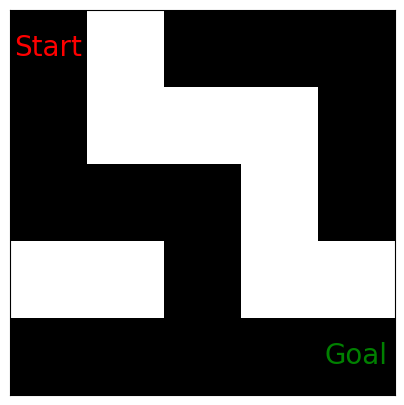

In [2]:
maze = get_first_example_maze()

print("Data used to define the maze : ")
print(maze.maze)

maze.show_maze()

## **Testing the Agent**

In [3]:
"""
Creating our agent :

This is the automated system that will solve mazes.

To start it takes random actions. 
"""
agent = QLearningAgent(
    maze, 
    maze.get_actions(), 
    num_episodes=100
)

The code below tests how well the agent navigates the maze. It reports the total number of steps the agent took to get through the maze as well as the total reward the agent accumulated.

Every time you want to test the agent, run the function ten times.  Each time note the number of steps the agent used to travel between the start and the goal, as well as the total reward. Calculate the average steps and average reward across all ten test trials.

For your engineering project you will:
1. Test the agent before training.
2. Try solving the maze yourself by hand. What is the fewest number of steps you can take to solve the maze?
2. Test the agent after training with the default reward system values.
3. Make changes to the default reward system and test the agent.  You will repeat this until you have an agent who is learning very well.

##**Defining the Reward System**

This code determines the values for the reward system. The reward system provides feedback to the agent in reinforcement learning.

Use these default settings to see how the agent performs when untrained, and when initially trained.  Then adjust the values and repeat the training and evalution steps outlines in the project idea.  Keep adjusting systematically until you have engineered the best possible reward system to have the AI learn to efficiently navigate a maze.

episode reward: -1147, episode step: 213
Learned Path:
(0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (2, 4)-> (3, 4)-> (2, 4)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 213
Total reward: -1147


<Figure size 640x480 with 0 Axes>

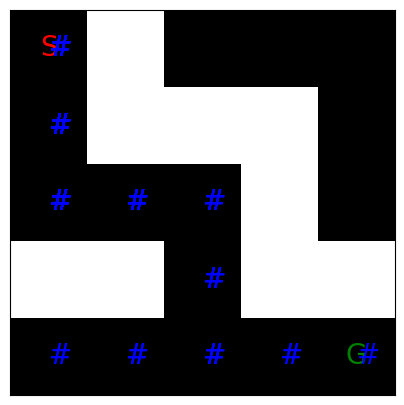

(213, -1147)

In [4]:
# Test the agent using the test_agent function
test_agent(agent, maze)

Did you notice that the untrained agent takes *a lot* of steps? That is because the agent keeps backtracking and hitting walls. Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

##**Setting Up the Reinforcement Learning Loop**

Below is the code for Q-learning, a basic reinforcement learning algorithm. This is used to train the agent. This code updates the Q-values based on the rewards it receives during exploration.  You do not need to change this code for your engineering project.

##**Training the Agent**

In [5]:
# This function simulates the agent's movements in the maze for a single episode.
default_reward_map = {
    "wall": -10,
    "step": -1,
    "goal": 100
}

Now let's train the agent to solve this maze. 
Run the following code block to start training.

episode reward: -143, episode step: 46
episode reward: -367, episode step: 90
episode reward: -127, episode step: 39
episode reward: -179, episode step: 55
episode reward: -71, episode step: 37
episode reward: -297, episode step: 83
episode reward: 1, episode step: 28
episode reward: -23, episode step: 34
episode reward: -155, episode step: 40
episode reward: 49, episode step: 16
episode reward: 41, episode step: 24
episode reward: 39, episode step: 17
episode reward: 31, episode step: 16
episode reward: 51, episode step: 14
episode reward: 73, episode step: 10
episode reward: 93, episode step: 8
episode reward: 69, episode step: 14
episode reward: 81, episode step: 11
episode reward: 81, episode step: 11
episode reward: 41, episode step: 15
episode reward: 13, episode step: 16
episode reward: 53, episode step: 12
episode reward: 73, episode step: 10
episode reward: 83, episode step: 9
episode reward: 71, episode step: 12
episode reward: 83, episode step: 9
episode reward: 73, episode 

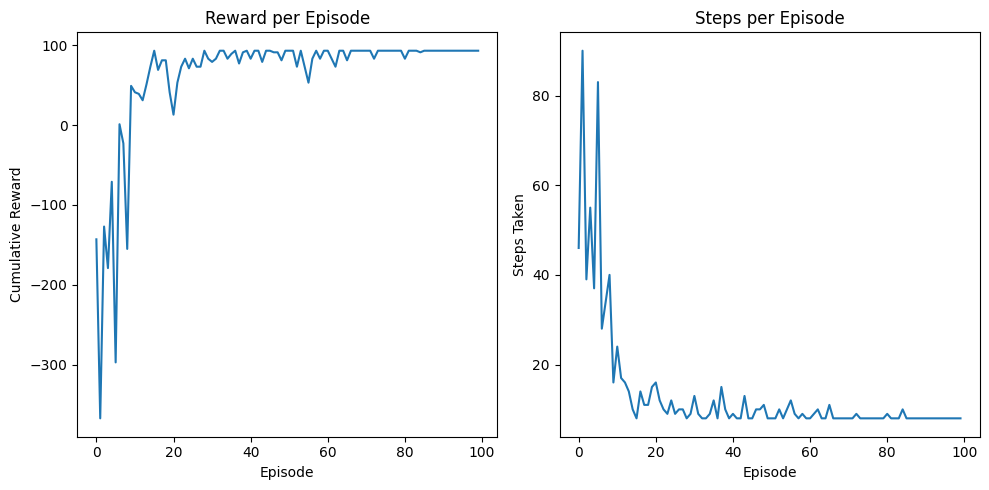

In [6]:

# Training the agent
train_agent(agent, maze, reward_map=default_reward_map)


## **Evaluating the Agent**

1. Test the agent again using the test_agent function. Run the code 10 times and note how many steps the agent takes to reach the goal. On average, how many steps does the agent take?
2. Does the agent consistently find the shortest path from the starting position to the goal?

episode reward: 93, episode step: 8
Learned Path:
(0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (3, 4)-> (4, 4)-> Goal!
Number of steps: 8
Total reward: 93


<Figure size 640x480 with 0 Axes>

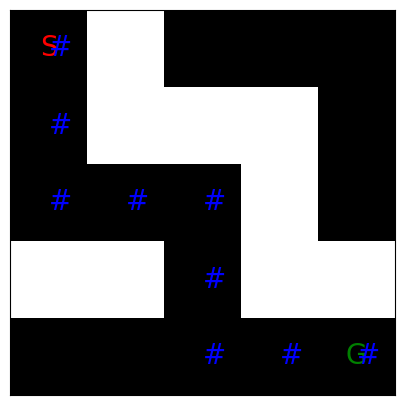

(8, 93)

In [7]:
#Now test again

# Finishes MUCH Faster!
test_agent(agent, maze)

In [8]:
for i in range(maze.maze_width):
    for j in range(maze.maze_height):
        print(f"{i},{j} : {list(zip(agent.actions, [float(v) for v in list(agent.q_table[i,j,:])]))}")


0,0 : [('down', 33.820416233307384), ('up', -7.887233300454185), ('left', -8.729870945310337), ('right', -9.237108263976559)]
0,1 : [('down', 42.9174815311553), ('up', -2.0372610718554296), ('left', -10.790579134039236), ('right', -7.436210327990334)]
0,2 : [('down', -9.00375218683482), ('up', -0.438143215141236), ('left', -3.8432537841042067), ('right', 51.93275293251814)]
0,3 : [('down', 0.0), ('up', 0.0), ('left', 0.0), ('right', 0.0)]
0,4 : [('down', -4.7709819482968), ('up', -4.753130472442), ('left', -2.75879665918), ('right', -0.491152973068)]
1,0 : [('down', 0.0), ('up', 0.0), ('left', 0.0), ('right', 0.0)]
1,1 : [('down', 0.0), ('up', 0.0), ('left', 0.0), ('right', 0.0)]
1,2 : [('down', 5.263214007081116), ('up', -6.447714300361378), ('left', 3.8435151974711337), ('right', 60.80126386920723)]
1,3 : [('down', 0.0), ('up', 0.0), ('left', 0.0), ('right', 0.0)]
1,4 : [('down', -4.061192753709999), ('up', -4.86311330911159), ('left', -0.6517036514323), ('right', 11.199706242271201)

## **Experimenting and Improving**

Try experimenting with a different reward system to see how that affects how the agent learns. Copy or run this cell multiple times, changing the goal reward from 0 to 1, 10, 20, 30, etc.. and to 100, and 1000.

episode reward: -14.900000000000016, episode step: 43
episode reward: -134.4999999999998, episode step: 258
episode reward: -26.90000000000002, episode step: 82
episode reward: -1.6999999999999975, episode step: 28
episode reward: 5.1, episode step: 14
episode reward: 0.7000000000000028, episode step: 31
episode reward: 0.3000000000000025, episode step: 26
episode reward: 6.9, episode step: 14
episode reward: 8.1, episode step: 11
episode reward: 8.7, episode step: 14
episode reward: 8.299999999999999, episode step: 9
episode reward: 9.1, episode step: 10
episode reward: 8.9, episode step: 12
episode reward: 9.3, episode step: 8
episode reward: 9.1, episode step: 10
episode reward: 9.3, episode step: 8
episode reward: 9.3, episode step: 8
episode reward: 9.3, episode step: 8
episode reward: 8.1, episode step: 11
episode reward: 9.3, episode step: 8
episode reward: 9.3, episode step: 8
episode reward: 9.3, episode step: 8
episode reward: 9.3, episode step: 8
episode reward: 8.2999999999

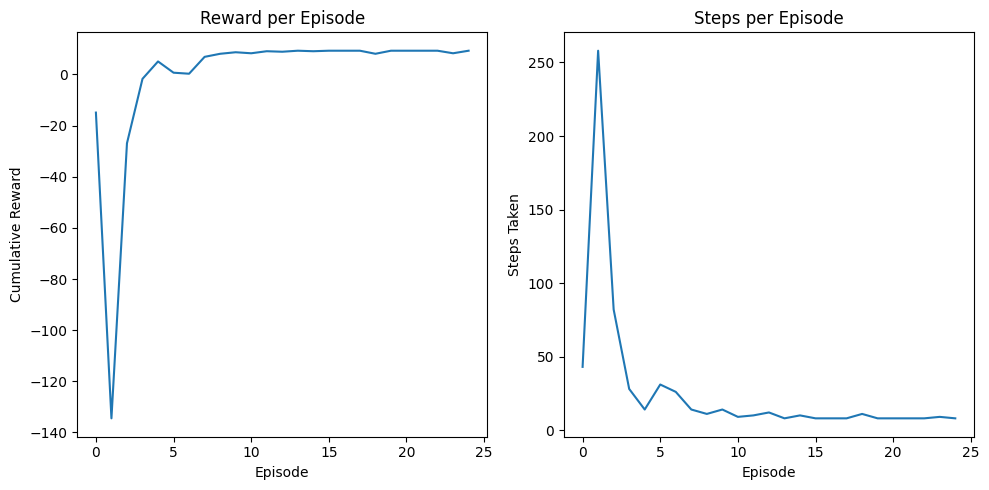

In [9]:

agent = QLearningAgent(
    maze, 
    maze.get_actions(), 
    num_episodes=25
)

train_agent(agent, maze, reward_map = {
    "wall": -1,
    "step": -0.1,
    "goal": 10.0
})